# Lab 9

In [ ]:
FIRST_NAME = "Leng"
LAST_NAME = "Her"
STUDENT_ID = "5445877"

## Introduction

This lab will be an introduction to using the 2 most popular deep learning frameworks: Pytorch and Tensorflow. We will use the same MNIST data set from the previous lab, except this time we will build convolutional neural networks. 

## The Data Set

**Data Description**

The MNIST data set is a standard data set for machine learning and computer vision. NIST stands for the **N**ational **I**nstitute for **S**tandards and **T**echnology, which created a data set of hand written digits from high school students and US Census Bureau. MNIST is the **M**odified version of that data set that standardizes all the images to 28x28 pixel greyscale images.

This data set is commonly used as an introduction to neural networks, deep learning, computer vision, and optical character recognition (OCR).

**Data Dictionary**

 * Each row represents 1 image
 * Each column is a specific pixel location
 * The values of the data frame are how dark/light each pixel in the image is (0-255)

| Column Name | Type | Description |
| :----------- | :-- | :----------- |
| 0 | `int` | Digit of the image |
| 1-784 | `float` | Darkness of the pixel |

**Data Sample**

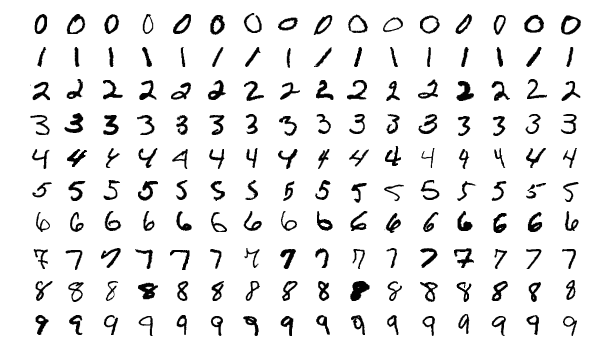

## Tensorflow & Keras

The first 5 questions will be related to writing code that trains and evaluates a convolutional neural network with Keras and Tensorflow. Use this Keras MNIST [tutorial](https://keras.io/examples/vision/mnist_convnet/) as a reference.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

### Question 1

Load in the MNIST data into Numpy arrays named `x_train`, `y_train`, `x_test`, and `y_test` using the `keras.datasets` module.

Resources
 * TF Keras datasets [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)
 * Keras MNIST [tutorial](https://keras.io/examples/vision/mnist_convnet/) 

In [2]:
# Load the MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("First y_train value: ", y_train[0])

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
First y_train value:  5


### Question 2

Preprocess the Numpy arrays containing the MNIST data to be inputs into a Keras neural network with the following 3 steps:

* i. Scale all the values of the pixels (x_train, x_test) to be between 0 and 1 by dividing the values by 255.

* ii. Add a dimension to the x_train and x_test arrays using the `np.expand_dums()` [function](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html). So instead of x_train having a shape of (60000, 28, 28), change it to have the shape equal to (60000, 28, 28, 1).

* iii. Use the `keras.utils.to_categorical()` [function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) to create a one hot encoding of the label variable (similar to [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) in Scikit Learn)

In [23]:
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add a channel dimension to the images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [24]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("First y_train value: ", y_train[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
First y_train value:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Question 3

Define the convolutional neural network model using the `keras.Sequential` [object](https://keras.io/api/models/sequential/). Use the same network architecture as in the Keras MNIST [tutorial](https://keras.io/examples/vision/mnist_convnet/). Save the result into a variable named `tf_model`.

**Network layers**
* Input (shape=28,28,1)
* Conv2D (filters=32, kernel_size=3,3, activation=relu)
* MaxPooling2D (pool_size=2,2)
* Conv2D (filters=64, kernel_size=3,3, activation=relu)
* MaxPooling2D (pool_size=2,2)
* Flatten
* Dropout (rate=0.5)
* Dense (units=10, activation=softmax)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Define the model architecture
tf_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [26]:
tf_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

### Question 4

Compile and fit the model to the training data.

**Compile step**   
Run the `.compile()` method of the `tf_model` object that you created with the following arguments:
* loss = "categorical_crossentropy"
* optimizer = "adam"
* metrics = ["accuracy"]

**Fit step**    
Run the `.fit()` method of the `tf_model` with the x and y training sets. Set the following input arguments:
* batch_size = 128
* epochs = 5
* validation_split = 0.1 

In [27]:
# Compile the model
tf_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# Fit the model to the training data
history = tf_model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=5,
                       validation_split=0.1)


Epoch 1/5
422/422 [==============================] - 35s 81ms/step - loss: 0.3624 - accuracy: 0.8916 - val_loss: 0.0873 - val_accuracy: 0.9748
Epoch 2/5
422/422 [==============================] - 33s 78ms/step - loss: 0.1167 - accuracy: 0.9648 - val_loss: 0.0556 - val_accuracy: 0.9848
Epoch 3/5
422/422 [==============================] - 34s 80ms/step - loss: 0.0873 - accuracy: 0.9724 - val_loss: 0.0472 - val_accuracy: 0.9867
Epoch 4/5
422/422 [==============================] - 34s 81ms/step - loss: 0.0722 - accuracy: 0.9774 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 5/5
422/422 [==============================] - 34s 79ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0365 - val_accuracy: 0.9910


### Question 5

Evaluate the accruacy of the model on the training and testing sets. Use the `.evaluate()` [method](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) of the `tf_model` object. Then print out the loss and accuracy of both the training and testing sets.



In [28]:
# Evaluate the model on the training set
train_loss, train_acc = tf_model.evaluate(x_train, y_train, verbose=0)
print('Training loss: {}, Training accuracy: {}'.format(train_loss, train_acc))

Training loss: 0.034619104117155075, Training accuracy: 0.9898166656494141


In [29]:
# Evaluate the model on the test set
test_loss, test_acc = tf_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc))

Test loss: 0.035138096660375595, Test accuracy: 0.9889000058174133


## Pytorch & Torchvision

Questions 6-10 for this lab will be replicating the same model with Pytorch (building a CNN for the MNIST dataset). This time, the code is already written but it does not have any comments. Your job for answering the questions will be to describe how the various Pytorch functions and modules work, what they do, and why they are important for training and evaluating a CNN.

In [31]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

### Question 6
First, read this article: [Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).    
Then write a short description of Pytorch DataLoaders and Datasets. What do they do and how are they realted?

---
> **_Q6 Answer_**   
>     Pytorch Datasets and DataLoaders allows us to use pre-loaded datasets as well as our own data in Pytorch. Datasets will store the samples and their labels while DataLoaders are an iterable around the dataset essentially doing small batch samples while also shuffling the data. 

Basically, Pytorch Datasets contain the data and DataLoaders make it easier to access.

---


In [32]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [33]:
train_loader = DataLoader(training_data, batch_size=128)
test_loader = DataLoader(test_data, batch_size=128)

### Question 7
Read this article giving an introduction to Pytorch called [_"What is torch.nn really?"_](https://pytorch.org/tutorials/beginner/nn_tutorial.html).  
Then write a summary about each of the different parts of the `torch.nn` module and what they are used for.

---
> **_Q7 Answer_**   

nn.Module: It is like a container that can hold other modules and parameters, and can perform calculations in a forward pass. You need to define the forward() function to explain how to transform input data into output.

nn.Parameter: A wrapper for a tensor that you want to treat as a parameter that can be trained. Pytorch tracks and updates gradients for all parameters.

nn.Sequential: A container to stack multiple nn.Module instances one after the other to create a feedforward neural network. It simplifies creating neural networks.

nn.Functional: A module that includes commonly used activation functions, loss functions, and other operations used in neural networks.

nn.Conv2d, nn.Linear: These are the neural network layers used for convolutions and linear transformations. They define learnable parameters that are updated to transform input data into output data.

nn.CrossEntropyLoss, nn.MSELoss: These are the examples of loss functions that can be used to train neural networks. CrossEntropyLoss is used for classification tasks, and MSELoss is used for regression tasks.

nn.Optimizer: A base class for all optimization algorithms in Pytorch. It is used to update the learnable parameters of neural networks during training.    

---


In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout = nn.Dropout(0.5)
        self.fullyconnected = nn.Linear(1600, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fullyconnected(x)
        output = F.log_softmax(x, dim=1)
        return output

### Question 8
For each of the lines of code below, describe what they do and why it is needed in the model training process. What would go wrong if that step was forgotten or removed?


--- 
```
    optimizer.zero_grad()
```
> *What does it do?*

  It sets the gradients of all parameters in the optimizer to zero.

> *Why is it needed?*
  It is needed because PyTorch accumulates gradients for each parameter with every backward pass. Therefore, we need to reset the gradients to zero before starting a new computation, otherwise the gradients will accumulate across batches and epochs.

--- 
```
    output = model(data)
```
> *What does it do?*

  It calculates the output of the neural network given some input data.

> *Why is it needed?*
  It is needed to make predictions on the input data, which is used to calculate the loss and update the model weights.
--- 
```
    loss = F.cross_entropy(output, target)
```
> *What does it do?*

  It calculates the cross-entropy loss between the output and the target.

> *Why is it needed?*
  It is needed to measure how well the model is performing on the task. The goal of training is to minimize this loss.
--- 
```
    loss.backward()
```
> *What does it do?*

  It computes the gradients of the loss with respect to all of the model parameters using backpropagation.

> *Why is it needed?*

  It is needed to calculate the gradient of the loss with respect to the model weights. This is necessary to update the weights in the right direction during optimization.
--- 
```
    optimizer.step()
```

> *What does it do?*

  It updates the parameters of the model using the computed gradients.
> *Why is it needed?*
   If this step is not performed, the model weights will not be updated and the loss will not improve over time.
--- 

In [34]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

### Question 9
For each of the lines of code below, describe what they do and why it is needed in the model evaluation process. What would go wrong if that step was forgotten or removed?

--- 
```
    model.eval()
```
> *What does it do?*

 it will turn off dropout and other such layers that are only active during the training phase.

> *Why is it needed?*
  During training, dropout and other regularization techniques are used to prevent overfitting. 
--- 
```
    with torch.no_grad()
```
> *What does it do?*

It temporarily disables the gradient calculation context, which makes the forward pass computations more memory-efficient

> *Why is it needed?*
During evaluation, we don't need to compute gradients since we're not going to backpropagate and update the model's parameters. If we forget to use this ehn memory usage during evaluation will be unnecessarily high and the evaluation may run slower.
---

In [36]:

def test(model, device, test_loader):
    test_loss = 0
    correct = 0
    model.eval()
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

### Question 10
What does the `.to(device)` method do and why is it needed - what would happen if that step was forgotten or removed?


---
> **_Q10 Answer_**   
>     Used to move a tensor or a model to a specified device, such as a CPU or a GPU. Needed to ensure that the model is using the proper available hardware resources for computation. If this step is forgotten or removed, the model will remain on the default device, which could be the CPU or GPU

---


In [37]:
n_epochs = 5
device = torch.device("cpu")
torch_model = Net().to(device)
optimizer = optim.Adam(torch_model.parameters())

for epoch in range(n_epochs):
    train(torch_model, device, train_loader, optimizer, epoch+1)
    test(torch_model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304742
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.240950
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.149276
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.168552
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.193709

Test set: Average loss: 0.0829, Accuracy: 9741/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.093725
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.114255
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.097460
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.057916
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.151071

Test set: Average loss: 0.0598, Accuracy: 9813/10000 (98%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.129273
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.093605
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.064539
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.081091
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.115277

Test set: Average loss: 0.0447, Accuracy: 9847/10000 (98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.094472
Train Epoch: 4 [12800/60000 (21%)]	Lo

## Compare/Constrast


### Question 11
Write a paragraph to summarize the similarities and differences between Tensorflow and Pytorch. Cite or link to any sources you find that help with your answer.

---
> **_Q11 Answer_**   
> Both TensorFlow and Pytorch are simililar in some features such as differentiation and GPU acceleration and both can be used for a variety of things such as: NLP, computer vision and feinforcement learning. However there are some differences that can be noted. One of these differences is that TensorFlow has a wider range of tools and resources making it more accessible for beginners. It also hads built-in support for computing and is suited for deploying models. Pytorch on the other hand has more python type syntax making it a bit easier to understand and write. It also allows for more flexibility and model building with the addition of visualization tools.    

---


References: 

https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b

https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d

https://www.simplilearn.com/keras-vs-tensorflow-vs-pytorch-article



### Question 12
If you needed to build a neural network for image recognition right now, would you prefer to use Tensorflow or Pytorch? And why?

_Note: Either choice is fine, this question is about matching the reasoning "why" behind the one of the choices._

---
> **_Q12 Answer_**   
> If I needed to build a neural network for image recognition right now, I would prefer to use Pytorch. One of the main reasons for this is that Pytorch has more flexibility and experimentation, which is usefull for doing research and testing things out. Pytorch also has dynamic graphs which are easier to debug making it easier to build in general.    

---